In [1]:
import pandas as pd
from collections import Counter
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import requests
import time
from tqdm import tqdm
import folium
from folium.plugins import MarkerCluster

- wordcloud는 cmd에서 다운
    - pip insiall wordcloud

In [2]:
from matplotlib import font_manager, rc
import matplotlib
font_path = 'C:/Windows/Fonts/malgun.ttf'
font_name = font_manager.FontProperties(fname = font_path).get_name()
rc('font', family=font_name)

In [3]:
raw_total = pd.read_excel("./data/crawling_raw.xlsx")
raw_total

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."
...,...,...,...,...,...
8796,Now it's purple😆💜수색 넘 이쀼리 🤭 올해는 아퓨지말구 즐거운 일만 가...,2019-01-01,42,NaN,"['#일상', '#구기자', '#티타임', '#2019', '#새해', '#차스타그..."
8797,.간다간다간다#제주 #친정여행 #겨울방학 #제주여행앞머리는 괜히 전날 잘라서 또순이...,2019-01-01,50,NaN,"['#제주', '#친정여행', '#겨울방학', '#제주여행앞머리는', '#친정찬스'..."
8798,2019년 모두 복 많이많이 받고 풍요로운 한해 보내길 ♥️#사진좀찍으시는님덕에건져...,2019-01-01,68,Jeju,"['#사진좀찍으시는님덕에건져또', '#이순간']"
8799,2018.12.25 ⠀룸에 의자가 두개 밖에 없어서 ⠀이현이는 유모차에 앉아서 식사...,2019-01-01,70,NaN,[]


In [5]:
raw_total.shape

(8801, 5)

In [6]:
raw_total.dtypes

content    object
date       object
like       object
place      object
tags       object
dtype: object

In [7]:
raw_total.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8801 entries, 0 to 8800
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   content  8801 non-null   object
 1   date     8801 non-null   object
 2   like     8801 non-null   object
 3   place    2953 non-null   object
 4   tags     8801 non-null   object
dtypes: object(5)
memory usage: 343.9+ KB


In [15]:
# 해시태그 통합 저장
tags_total = []

for tag in raw_total["tags"]:
    # str을 리스트로 변환
    tag = eval(tag)
    tags_total.extend(tag)

## 해시태그 출현 빈도

In [16]:
# 그룹 내 원소의 종류별 빈도수를 집계
tag_counts = Counter(tags_total)

In [17]:
# 가장 빈도수가 높은 해시태그 50개
tag_counts.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주도', 2096),
 ('#제주', 1567),
 ('#제주도여행', 1556),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#jeju', 776),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#일상', 717),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#선팔', 522),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#제주반영구', 478),
 ('#중문맛집', 472),
 ('#제주눈썹문신', 472),
 ('#제주도관광', 471),
 ('#서귀포눈썹문신', 458),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#반영구', 443),
 ('#눈썹문신', 443),
 ('#제주자연눈썹', 435),
 ('#제주속눈썹', 435),
 ('#서귀포남자눈썹문신', 433)]

In [27]:
# 제주도 맛집과 관계없는 해시태그 제외
# STOPWORDS 불용어사전
STOPWORDS = ["#일상","#제주도","#선팔","#jeju","#반영구","#제주자연눈썹",
             "#서귀포눈썹문신","#제주눈썹문신","#제주반영구","#눈썹문신",
            "#제주속눈썹","#서귀포남자눈썹문신","#제주남자눈썹문신",
             "#서귀포속눈썹","#서귀포반영구","#소통","#맞팔", "#제주메이크업",
            "#제주속눈썹연장"]

In [28]:
tag_total_selected = [tag for tag in tags_total if tag not in STOPWORDS]

In [29]:
tag_counts_selected = Counter(tag_total_selected)

In [30]:
tag_counts_selected.most_common(50)

[('#제주맛집', 3750),
 ('#제주도맛집', 3467),
 ('#제주여행', 3204),
 ('#제주관광', 2898),
 ('#제주', 1567),
 ('#제주도여행', 1556),
 ('#서귀포맛집', 1392),
 ('#제주도가볼만한곳', 1047),
 ('#서귀포', 872),
 ('#제주핫플레이스', 848),
 ('#제주흑돼지맛집', 730),
 ('#제주맛집추천', 728),
 ('#제주도흑돼지', 713),
 ('#제주카페', 711),
 ('#제주도흑돼지맛집', 709),
 ('#제주흑돼지', 693),
 ('#협재맛집', 677),
 ('#성산일출봉', 674),
 ('#제주도민', 637),
 ('#제주도그램', 609),
 ('#서귀포흑돼지맛집', 605),
 ('#서귀포흑돼지', 582),
 ('#제주가볼만한곳', 580),
 ('#성산일출봉맛집', 567),
 ('#섭지코지', 558),
 ('#제주도민맛집', 542),
 ('#제주핫플', 530),
 ('#섭지코지맛집', 519),
 ('#제주살이', 516),
 ('#여행스타그램', 498),
 ('#통갈치구이', 495),
 ('#제주통갈치구이', 485),
 ('#제주서귀포맛집', 479),
 ('#중문맛집', 472),
 ('#제주도관광', 471),
 ('#여행', 455),
 ('#먹스타그램', 453),
 ('#제주시', 451),
 ('#서귀포자연눈썹', 433),
 ('#제주스타그램', 432),
 ('#제주일상', 424),
 ('#애월맛집', 410),
 ('#제주시맛집', 387),
 ('#카멜리아힐', 384),
 ('#중문흑돼지맛집', 377),
 ('#daily', 362),
 ('#제주도여행코스', 361),
 ('#가족여행', 357),
 ('#제주도카페', 354),
 ('#jejuisland', 348)]

### 막대차트 

In [31]:
# 시각화용 데이터 준비
tag_counts_df = pd.DataFrame(tag_counts_selected.most_common(30))
tag_counts_df.columns = ["tags", "counts"]

In [32]:
tag_counts_df.head()

,tags,counts
0,#제주맛집,3750
1,#제주도맛집,3467
2,#제주여행,3204
3,#제주관광,2898
4,#제주,1567


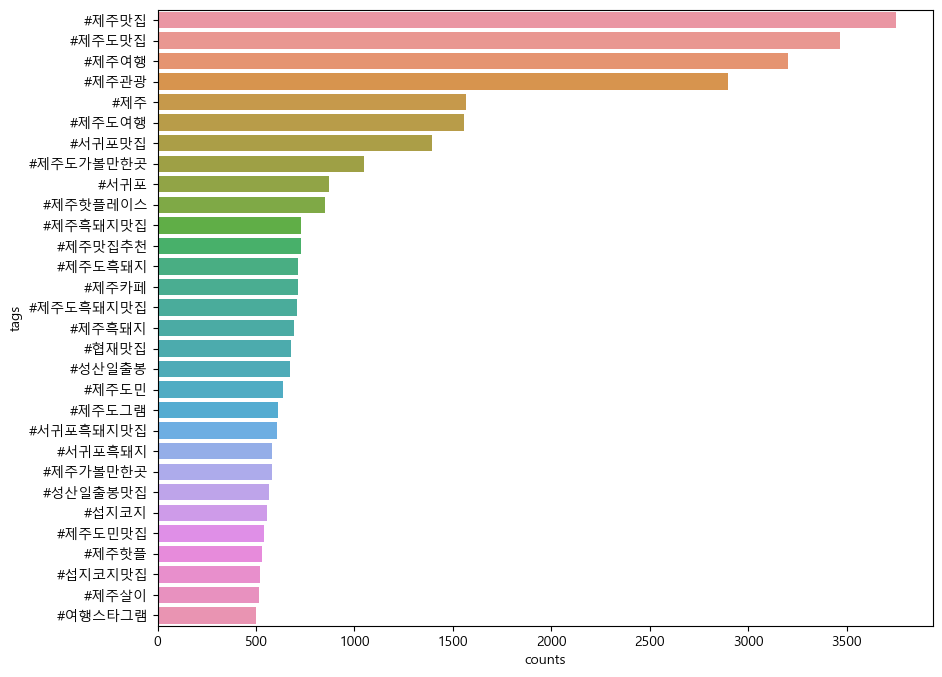

In [33]:
plt.figure(figsize = (10, 8))
sns.barplot(x = "counts", y = "tags", data = tag_counts_df)
plt.show()

### 워드클라우드

In [35]:
wordcloud = WordCloud(
    font_path = font_path,
    background_color = "white", # 배경색
    max_words = 100,# 최대 몇 개의 단어를 나타낼 것인지 설정
    # 워드클라우드 내 글자들의 상대적인 크기(0 ~ 1)
    # 0에 가까울수록 순위, 1에 가까울수록 빈도수에 영향을 받음
    relative_scaling = 0.3, 
    width = 800,
    height = 400).generate_from_frequencies(tag_counts_selected)

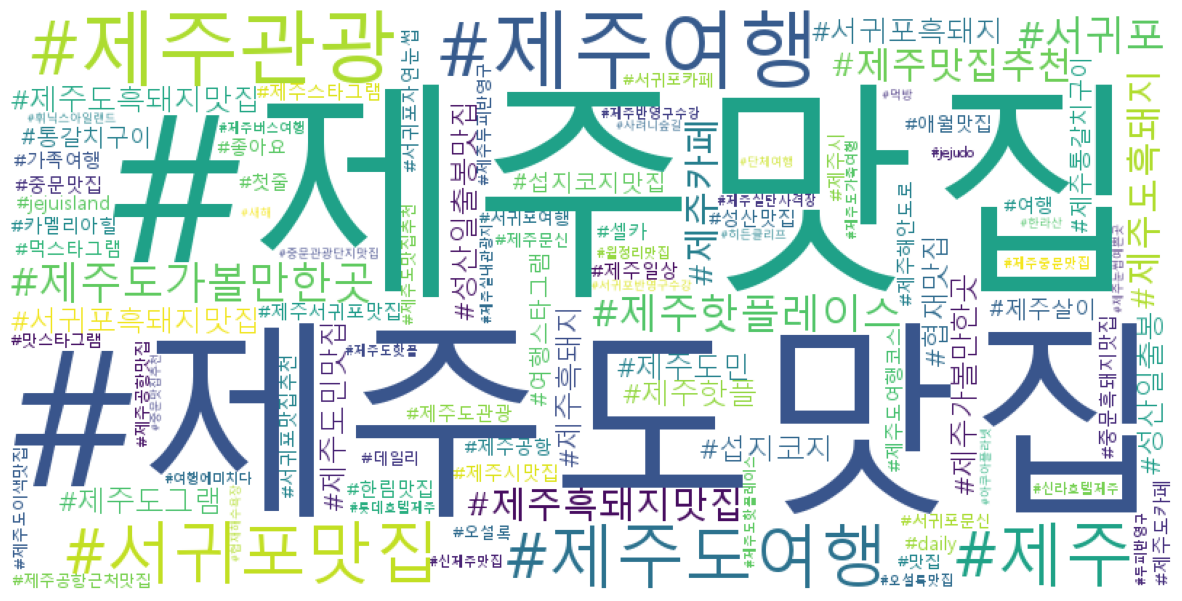

In [39]:
plt.figure(figsize = (15, 10))
plt.imshow(wordcloud)
plt.axis("off")
plt.savefig("tag-wordcloud.png") # 시각화 파일 저장
plt.show()

### 지도 시각화

In [40]:
raw_total.head()

,content,date,like,place,tags
0,더 늦기전에 제주도로 떠나쟈😍.#제주핫플레이스 간단히 1탄 모아봄!#제주여행 요 필...,2018-12-07,"1,402",NaN,"['#제주핫플레이스', '#제주여행', '#제주여행', '#제주도여행', '#제주가..."
1,12월에 제주도를 가야하는이유🍊.#제주핫플 모음 끝판왕😍이거 하나면 겨울 #제주여행...,2018-12-03,368,NaN,"['#제주핫플', '#제주여행', '#제주', '#제주도', '#제주도맛집', '#..."
2,11월 놓치지 말아야 할 제주 관광.가을바람이 최고조에 이르는 11월추운 겨울을 앞...,2018-11-02,166,NaN,"['#honestin', '#어니스틴', '#제주여행', '#제주', '#제주도',..."
3,국민학교세대#제주관광#제주살이#제주이주민#아라동주민#삼남매집 #새해첫날#드라이브#명...,2019-01-01,28,명월국민학교,"['#제주관광', '#제주살이', '#제주이주민', '#아라동주민', '#삼남매집'..."
4,#제주관광 #제주 #돔나이트 #스트레스 #풀자 #춤추며 #땀날려 #가끔은괜찮아 #인...,2019-01-01,12,NaN,"['#제주관광', '#제주', '#돔나이트', '#스트레스', '#풀자', '#춤추..."


### 위치정보 정리

In [42]:
location_counts = raw_total["place"].value_counts()
location_counts

place
Jeju                    271
Jeju-do                 179
Jungle Book by Alice    108
Seogwipo                 66
제주도 크리스마스 박물관            59
                       ... 
제주마당                      1
형제섬                       1
동복해녀식당                    1
종로 광장시장                   1
디스이즈핫                     1
Name: count, Length: 1028, dtype: int64

In [43]:
location_counts_df = pd.DataFrame(location_counts)

In [44]:
location_counts_df.head()

,count
place,
Jeju,271
Jeju-do,179
Jungle Book by Alice,108
Seogwipo,66
제주도 크리스마스 박물관,59


In [45]:
# 위치 정보의 종류 확인
location_counts_df.index

Index(['Jeju', 'Jeju-do', 'Jungle Book by Alice', 'Seogwipo', '제주도 크리스마스 박물관',
       '할로비치', '제주에인감귤밭', 'Jeju Island', '성산일출봉 城山日出峰  Seongsan Ilchulbong',
       '폼포코식당_pompokokitchen',
       ...
       '하이클래스 제주 (Hiclass Jeju)', '모닝딜라이트제주광양점', '하림각', '맥도날드장안사거리점', '탕196',
       '제주마당', '형제섬', '동복해녀식당', '종로 광장시장', '디스이즈핫'],
      dtype='object', name='place', length=1028)

#### 카카오api로 위경도 받아오기

- 72952e9497730909afd69a37f0e66a0d

In [46]:
url = "https://dapi.kakao.com/v2/local/search/keyword.json"

headers = {"Authorization" : "KakaoAK 72952e9497730909afd69a37f0e66a0d"} # api key

params = {"query" : "코리아it신촌"}

places = requests.get(url, headers = headers, params = params)

In [48]:
data = places.json()

In [51]:
data["documents"][0]

{'address_name': '서울 마포구 노고산동 106-89',
 'category_group_code': 'AC5',
 'category_group_name': '학원',
 'category_name': '교육,학문 > 학원 > 컴퓨터학원',
 'distance': '',
 'id': '112974234',
 'phone': '02-313-7300',
 'place_name': '코리아IT아카데미 신촌점',
 'place_url': 'http://place.map.kakao.com/112974234',
 'road_address_name': '서울 마포구 서강로 136',
 'x': '126.93578664586859',
 'y': '37.554041546037986'}

In [52]:
data["documents"][0]["place_name"]

'코리아IT아카데미 신촌점'

In [53]:
data["documents"][0]["x"]

'126.93578664586859'

In [54]:
data["documents"][0]["y"]

'37.554041546037986'

In [56]:
def find_places(searching):
    url = "https://dapi.kakao.com/v2/local/search/keyword.json"

    headers = {"Authorization" : "KakaoAK 72952e9497730909afd69a37f0e66a0d"}

    params = {"query" : searching}

    res = requests.get(url, headers = headers, params = params)
    
    # 필요한 정보 추출
    place = res.json()["documents"][0]
    
    name = place["place_name"]
    x = place["x"]
    y = place["y"]
    
    return [name, x, y, searching]

In [57]:
# 함수 테스트
data = find_places("제주공항")
data

['제주국제공항', '126.492769004244', '33.5070789578184', '제주공항']

#### 인스타그램 위치 좌표 수집

In [59]:
# 인스타그램 위치 좌표 수집
location_inform = []

for location in tqdm(location_counts_df.index):
    # 검색 결과가 나오지 않는 곳도 있음
    try:
        data = find_places(location)
        location_inform.append(data)
        time.sleep(0.1)
        
    except IndexError as e:
        print(location)
        time.sleep(0.1)

  0%|▏                                                                                | 2/1028 [00:00<06:27,  2.65it/s]

Jeju-do


  0%|▏                                                                                | 3/1028 [00:01<06:27,  2.65it/s]

Jungle Book by Alice


  1%|▋                                                                                | 9/1028 [00:03<06:21,  2.67it/s]

성산일출봉 城山日出峰  Seongsan Ilchulbong


  1%|▊                                                                               | 10/1028 [00:03<06:24,  2.65it/s]

폼포코식당_pompokokitchen


  1%|▉                                                                               | 12/1028 [00:04<06:18,  2.69it/s]

Nimome


  2%|█▋                                                                              | 22/1028 [00:08<06:18,  2.65it/s]

제주도 서귀포 중문관광단지 濟州島西歸浦中文觀光團地


  2%|█▊                                                                              | 23/1028 [00:08<06:19,  2.65it/s]

제주고궁한복카페 jeju gogung hanbok studio


  3%|██▎                                                                             | 29/1028 [00:10<06:10,  2.70it/s]

김녕미로공원 Jeju Kimnyoung Maze Park


  3%|██▍                                                                             | 31/1028 [00:11<06:35,  2.52it/s]

제주 성산 신산포구자연산횟집 회포장


  5%|███▊                                                                            | 49/1028 [00:18<06:05,  2.68it/s]

위미2리 동백군락지


  5%|███▉                                                                            | 50/1028 [00:18<06:02,  2.70it/s]

Jeju Island 제주특별자치도 济州道


  5%|████▏                                                                           | 54/1028 [00:20<06:01,  2.70it/s]

한라산 (漢拏山, Hallasan)


  6%|████▌                                                                           | 59/1028 [00:22<06:47,  2.38it/s]

월정리카페콧수염


  6%|████▋                                                                           | 60/1028 [00:22<06:32,  2.47it/s]

牛岛 Udo Island 우도


  6%|█████▏                                                                          | 66/1028 [00:24<05:55,  2.70it/s]

제주 꿈꾸는고래 스쿠버&게스트하우스


  7%|█████▎                                                                          | 68/1028 [00:25<05:52,  2.73it/s]

Casa Linda Guesthouse-까사 린다 펜션


  7%|█████▎                                                                          | 69/1028 [00:26<05:52,  2.72it/s]

고집돌우럭-gozipfish


  7%|█████▍                                                                          | 70/1028 [00:26<05:53,  2.71it/s]

the cliff jeju - 더클리프 제주


  9%|███████                                                                         | 90/1028 [00:33<05:42,  2.74it/s]

퍼시픽랜드 - Pacific Land JEJU


  9%|███████▌                                                                        | 97/1028 [00:36<05:43,  2.71it/s]

함덕487


 10%|███████▋                                                                        | 99/1028 [00:37<05:41,  2.72it/s]

Paris, France


 10%|███████▊                                                                       | 101/1028 [00:37<05:39,  2.73it/s]

커피캄머


 10%|███████▉                                                                       | 103/1028 [00:38<05:40,  2.72it/s]

아날로그감귤체험


 10%|███████▉                                                                       | 104/1028 [00:38<05:39,  2.72it/s]

탐라반상


 10%|████████▏                                                                      | 107/1028 [00:40<05:41,  2.70it/s]

성산일출봉 게스트하우스 파티 띵까게스트하우스


 11%|████████▎                                                                      | 108/1028 [00:40<05:45,  2.67it/s]

Busan, South Korea


 11%|████████▍                                                                      | 109/1028 [00:40<05:53,  2.60it/s]

새별오름 (Saebyul Orum)


 11%|████████▍                                                                      | 110/1028 [00:41<05:47,  2.65it/s]

해발1950m 한라산 백록담


 11%|████████▉                                                                      | 117/1028 [00:43<05:37,  2.70it/s]

Sunnyside Beachclub Jeju


 11%|█████████                                                                      | 118/1028 [00:44<05:33,  2.73it/s]

The Shilla Jeju


 12%|█████████▏                                                                     | 119/1028 [00:44<05:32,  2.73it/s]

함덕반하다


 12%|█████████▎                                                                     | 121/1028 [00:45<05:35,  2.70it/s]

몽상드 애월 (Mônsant)


 13%|██████████▍                                                                    | 136/1028 [00:50<05:22,  2.76it/s]

Jeju horse Riding farm


 13%|██████████▌                                                                    | 138/1028 [00:51<05:19,  2.78it/s]

환상의 섬 Jeju Island


 14%|██████████▊                                                                    | 141/1028 [00:52<05:19,  2.78it/s]

커피파인더coffeefinder제주시청


 14%|██████████▉                                                                    | 143/1028 [00:53<05:17,  2.79it/s]

Seoul, South Korea


 14%|███████████▏                                                                   | 146/1028 [00:54<05:22,  2.73it/s]

Harmduck Beach in Jeju Island


 14%|███████████▎                                                                   | 148/1028 [00:55<05:19,  2.75it/s]

스윗슬로cafe


 15%|███████████▌                                                                   | 150/1028 [00:55<05:18,  2.75it/s]

하례정원


 15%|███████████▊                                                                   | 154/1028 [00:57<05:19,  2.74it/s]

Guzasien -구좌지앵


 16%|████████████▌                                                                  | 164/1028 [01:01<05:16,  2.73it/s]

천지연폭포 (Cheonjiyeon Waterfall)


 18%|██████████████▏                                                                | 185/1028 [01:08<05:11,  2.71it/s]

제주 서귀포 그릴 데미그라스


 18%|██████████████▎                                                                | 187/1028 [01:09<05:23,  2.60it/s]

Meal Table Garden


 19%|██████████████▋                                                                | 191/1028 [01:11<05:09,  2.70it/s]

하얏트 리젠시 제주ㅣHyatt Regency Jeju


 20%|███████████████▌                                                               | 202/1028 [01:15<05:11,  2.65it/s]

Hotel Alfonso XIII, a Luxury Collection Hotel, Seville


 20%|███████████████▌                                                               | 203/1028 [01:15<05:10,  2.66it/s]

탐나버거


 20%|███████████████▊                                                               | 205/1028 [01:16<05:10,  2.65it/s]

보엠 - Bohème


 21%|████████████████▎                                                              | 212/1028 [01:19<05:04,  2.68it/s]

그러므로part.2


 21%|████████████████▌                                                              | 215/1028 [01:20<05:03,  2.67it/s]

광안리 해수욕장 - 廣安里海水浴場 GwangalliBeach, Busan, South Korea


 21%|████████████████▊                                                              | 218/1028 [01:21<05:01,  2.68it/s]

핏제리아마노


 21%|████████████████▊                                                              | 219/1028 [01:21<05:00,  2.69it/s]

Ulsan, South Korea


 22%|█████████████████▋                                                             | 230/1028 [01:25<05:23,  2.47it/s]

애월해안가


 23%|██████████████████                                                             | 235/1028 [01:27<04:59,  2.65it/s]

Jeju_Gimnyeong_Maze_Park


 23%|██████████████████▏                                                            | 236/1028 [01:28<04:58,  2.66it/s]

동굴카페 다희연(Cafe Daheeyeon in the Cave)


 24%|██████████████████▋                                                            | 243/1028 [01:30<05:03,  2.59it/s]

Daegu, South Korea


 24%|███████████████████▎                                                           | 251/1028 [01:33<04:46,  2.71it/s]

다다의작은공간


 25%|███████████████████▉                                                           | 260/1028 [01:37<04:40,  2.74it/s]

붉은못허브팜 Cafe Redpond 애월본점


 25%|████████████████████▏                                                          | 262/1028 [01:37<04:43,  2.71it/s]

2월22일 브런치카페


 26%|████████████████████▍                                                          | 266/1028 [01:39<04:47,  2.65it/s]

뉴저지카페


 26%|████████████████████▌                                                          | 267/1028 [01:39<04:42,  2.69it/s]

쿠오모제주


 27%|█████████████████████▌                                                         | 280/1028 [01:44<04:39,  2.68it/s]

제주 조류공원 화조원


 27%|█████████████████████▌                                                         | 281/1028 [01:44<04:37,  2.69it/s]

윗세오름(해발 1700M)


 28%|██████████████████████▏                                                        | 288/1028 [01:47<04:36,  2.68it/s]

빨간머리몽게스트하우스


 29%|██████████████████████▋                                                        | 296/1028 [01:50<04:32,  2.69it/s]

済州島 - チェジュ島


 29%|███████████████████████                                                        | 300/1028 [01:51<04:27,  2.72it/s]

Hamdoek Beach, Jeju Island


 30%|███████████████████████▎                                                       | 304/1028 [01:53<04:20,  2.78it/s]

JEJU앨리스


 30%|███████████████████████▍                                                       | 305/1028 [01:53<04:22,  2.75it/s]

Ecoland Theme Park Forest Train黃花小火車


 30%|███████████████████████▉                                                       | 311/1028 [01:55<04:21,  2.74it/s]

천왕사 (天王寺)


 31%|████████████████████████▏                                                      | 314/1028 [01:56<04:17,  2.78it/s]

Oedolgae Jeju


 32%|████████████████████████▉                                                      | 324/1028 [02:00<04:16,  2.74it/s]

한동올레펜션


 32%|█████████████████████████▏                                                     | 327/1028 [02:01<04:22,  2.67it/s]

빨간모자마법사


 32%|█████████████████████████▍                                                     | 331/1028 [02:03<04:16,  2.72it/s]

Namwon Seogwipo Jeju,South korea


 33%|██████████████████████████▏                                                    | 340/1028 [02:06<04:14,  2.70it/s]

제스토리, 바이제주, 제주감성소품


 33%|██████████████████████████▏                                                    | 341/1028 [02:06<04:17,  2.67it/s]

Hyatt Regency, Jeju Island


 34%|██████████████████████████▋                                                    | 347/1028 [02:09<04:07,  2.75it/s]

빌라드아토


 34%|██████████████████████████▋                                                    | 348/1028 [02:09<04:08,  2.74it/s]

Uncommon Table


 34%|███████████████████████████                                                    | 352/1028 [02:10<04:14,  2.65it/s]

Bongcheon-dong


 35%|███████████████████████████▎                                                   | 355/1028 [02:12<04:09,  2.70it/s]

타쿠마 - Takuma


 35%|███████████████████████████▎                                                   | 356/1028 [02:12<04:14,  2.64it/s]

카페모리&베이커스트리트


 35%|███████████████████████████▋                                                   | 361/1028 [02:14<04:05,  2.72it/s]

Gwakji Beaches


 35%|███████████████████████████▉                                                   | 363/1028 [02:15<04:02,  2.74it/s]

Salon De 소자38


 36%|████████████████████████████▌                                                  | 371/1028 [02:18<03:56,  2.77it/s]

라비에 와인비스트로


 36%|████████████████████████████▋                                                  | 373/1028 [02:18<03:55,  2.78it/s]

리틀이태리 비스트로


 36%|████████████████████████████▊                                                  | 375/1028 [02:19<03:56,  2.76it/s]

섶섬해녀할망카페


 37%|████████████████████████████▉                                                  | 376/1028 [02:19<04:00,  2.71it/s]

풍미독서


 37%|█████████████████████████████                                                  | 378/1028 [02:20<03:59,  2.72it/s]

가드망제


 37%|█████████████████████████████▎                                                 | 381/1028 [02:21<03:58,  2.71it/s]

바굥식당


 37%|█████████████████████████████▎                                                 | 382/1028 [02:22<04:01,  2.68it/s]

어라운드 폴리 Around Follie


 37%|█████████████████████████████▌                                                 | 385/1028 [02:23<04:04,  2.63it/s]

바람코지 게스트하우스&카페


 38%|█████████████████████████████▊                                                 | 388/1028 [02:24<04:05,  2.60it/s]

한모살식당


 38%|█████████████████████████████▉                                                 | 389/1028 [02:24<04:01,  2.64it/s]

어반가라지


 38%|██████████████████████████████                                                 | 392/1028 [02:25<03:52,  2.74it/s]

미미본가


 39%|██████████████████████████████▍                                                | 396/1028 [02:27<03:54,  2.69it/s]

Coco Mama


 39%|██████████████████████████████▋                                                | 400/1028 [02:28<03:51,  2.71it/s]

군산 정상


 39%|███████████████████████████████                                                | 404/1028 [02:30<03:57,  2.63it/s]

제주한면가 濟州韓麵家


 39%|███████████████████████████████                                                | 405/1028 [02:30<03:59,  2.60it/s]

못생김


 40%|███████████████████████████████▎                                               | 407/1028 [02:31<03:52,  2.68it/s]

Cafe멘도롱


 40%|███████████████████████████████▎                                               | 408/1028 [02:31<03:47,  2.72it/s]

드렁큰디제이


 40%|███████████████████████████████▋                                               | 412/1028 [02:33<03:47,  2.71it/s]

로드129


 40%|███████████████████████████████▊                                               | 414/1028 [02:34<03:47,  2.70it/s]

팀버 커피 제주


 41%|████████████████████████████████▍                                              | 422/1028 [02:37<04:00,  2.52it/s]

베이크샵스니프 bakeshop sniff


 41%|████████████████████████████████▌                                              | 424/1028 [02:38<03:53,  2.59it/s]

장복호


 41%|████████████████████████████████▋                                              | 426/1028 [02:38<03:51,  2.60it/s]

제주인의밥상


 42%|████████████████████████████████▉                                              | 428/1028 [02:39<03:44,  2.67it/s]

제주시 조천읍 와선로 206


 42%|█████████████████████████████████▏                                             | 432/1028 [02:41<03:50,  2.58it/s]

Mansion37.5


 42%|█████████████████████████████████▎                                             | 434/1028 [02:41<03:44,  2.65it/s]

포팩토리


 43%|█████████████████████████████████▉                                             | 441/1028 [02:44<03:39,  2.68it/s]

U-do Bong( 우도봉)


 43%|█████████████████████████████████▉                                             | 442/1028 [02:44<03:37,  2.70it/s]

동광 pâtisserie '東光'


 43%|██████████████████████████████████                                             | 443/1028 [02:45<03:36,  2.71it/s]

오메오메동문시장점


 44%|██████████████████████████████████▍                                            | 448/1028 [02:47<03:35,  2.69it/s]

돈테일러익스프레


 44%|██████████████████████████████████▌                                            | 449/1028 [02:47<03:35,  2.68it/s]

서귀동 298-5 '세계의 가정식'


 44%|██████████████████████████████████▋                                            | 452/1028 [02:48<03:35,  2.67it/s]

702키친


 45%|███████████████████████████████████▍                                           | 461/1028 [02:52<03:39,  2.59it/s]

제주워터월드/감귤노천탕


 45%|███████████████████████████████████▌                                           | 463/1028 [02:52<03:34,  2.63it/s]

투썸플레이스 제주애월한담점


 45%|███████████████████████████████████▋                                           | 464/1028 [02:53<03:33,  2.64it/s]

유민 아르누보 콜렉션


 45%|███████████████████████████████████▋                                           | 465/1028 [02:53<03:31,  2.67it/s]

몽키비치


 46%|████████████████████████████████████▏                                          | 471/1028 [02:55<03:29,  2.65it/s]

저녁정원


 46%|████████████████████████████████████▌                                          | 475/1028 [02:57<03:27,  2.66it/s]

한화아쿠아넷


 46%|████████████████████████████████████▌                                          | 476/1028 [02:57<03:25,  2.69it/s]

Volskafé


 46%|████████████████████████████████████▋                                          | 477/1028 [02:58<03:24,  2.70it/s]

Maxim 모카다방


 47%|████████████████████████████████████▉                                          | 480/1028 [02:59<03:28,  2.63it/s]

성산일출봉 코앞 쉼터


 47%|█████████████████████████████████████▎                                         | 486/1028 [03:01<03:20,  2.70it/s]

해물뚝배기전문 재암식당


 47%|█████████████████████████████████████▍                                         | 487/1028 [03:01<03:19,  2.71it/s]

블루마린하우스


 48%|█████████████████████████████████████▋                                         | 490/1028 [03:02<03:18,  2.71it/s]

Saeyeon Bridge, Jeju Island


 48%|█████████████████████████████████████▋                                         | 491/1028 [03:03<03:19,  2.70it/s]

테라로사-이사랑


 48%|█████████████████████████████████████▉                                         | 494/1028 [03:04<03:16,  2.72it/s]

개똥이네 동물원


 48%|██████████████████████████████████████                                         | 496/1028 [03:05<03:17,  2.69it/s]

중문 마린파크 퍼시픽랜드


 48%|██████████████████████████████████████▏                                        | 497/1028 [03:05<03:18,  2.68it/s]

Oslob, Cebu


 48%|██████████████████████████████████████▎                                        | 498/1028 [03:05<03:16,  2.70it/s]

十五夜 siboya 십오야


 49%|██████████████████████████████████████▎                                        | 499/1028 [03:06<03:14,  2.71it/s]

폴레폴레게스트하우스 -Polepole Guesthouse in Jeju


 49%|██████████████████████████████████████▋                                        | 504/1028 [03:08<03:15,  2.68it/s]

헤이미쉬제주_제주독채펜션


 49%|██████████████████████████████████████▉                                        | 507/1028 [03:09<03:12,  2.71it/s]

중문관광단지 (Jungmun Tourism Complex)


 50%|███████████████████████████████████████▎                                       | 511/1028 [03:10<03:16,  2.63it/s]

포근한우리집


 50%|███████████████████████████████████████▌                                       | 515/1028 [03:12<03:11,  2.68it/s]

비양도 해녀촌


 51%|████████████████████████████████████████                                       | 521/1028 [03:14<03:09,  2.68it/s]

오운커피


 51%|████████████████████████████████████████▎                                      | 525/1028 [03:16<03:09,  2.66it/s]

카페하도섬/엠스테이펜션


 52%|█████████████████████████████████████████▎                                     | 538/1028 [03:20<03:00,  2.71it/s]

호끌락80번지


 53%|█████████████████████████████████████████▌                                     | 541/1028 [03:21<03:01,  2.68it/s]

비싸이드엠,beside-M


 53%|█████████████████████████████████████████▋                                     | 542/1028 [03:22<03:01,  2.68it/s]

제주초가집 곱들락


 53%|█████████████████████████████████████████▉                                     | 545/1028 [03:23<03:01,  2.66it/s]

인공위성 제주


 54%|██████████████████████████████████████████▎                                    | 550/1028 [03:25<02:59,  2.67it/s]

네이처캔바스


 54%|██████████████████████████████████████████▎                                    | 551/1028 [03:25<03:00,  2.64it/s]

머스태쉬커피/머스태쉬하우스


 54%|██████████████████████████████████████████▍                                    | 553/1028 [03:26<02:55,  2.70it/s]

마담제 게스트하우스


 54%|██████████████████████████████████████████▌                                    | 554/1028 [03:26<02:54,  2.72it/s]

단디501


 54%|██████████████████████████████████████████▋                                    | 556/1028 [03:27<02:54,  2.70it/s]

Kairos jeju


 55%|███████████████████████████████████████████▍                                   | 565/1028 [03:30<02:49,  2.74it/s]

Howard Johnson Jeju Yeondong Hotel - 하워드존슨 제주 연동 호텔


 55%|███████████████████████████████████████████▋                                   | 568/1028 [03:31<02:55,  2.61it/s]

BUTTON STAY 단추스테이 게스트하우스


 56%|████████████████████████████████████████████                                   | 573/1028 [03:33<02:51,  2.65it/s]

사우스바운더 Southbounder Brewery


 56%|████████████████████████████████████████████▏                                  | 575/1028 [03:34<02:50,  2.66it/s]

까망고띠


 57%|████████████████████████████████████████████▉                                  | 584/1028 [03:38<02:51,  2.59it/s]

빌리엔젤 제주노형점


 57%|█████████████████████████████████████████████▏                                 | 588/1028 [03:39<02:50,  2.58it/s]

내콩가


 57%|█████████████████████████████████████████████▎                                 | 589/1028 [03:40<02:49,  2.60it/s]

스테이굿무드


 58%|█████████████████████████████████████████████▌                                 | 593/1028 [03:41<02:48,  2.58it/s]

Bronx, New York


 58%|██████████████████████████████████████████████                                 | 599/1028 [03:43<02:40,  2.67it/s]

더아트스테이호텔-The Artstay Hotel


 59%|██████████████████████████████████████████████▍                                | 604/1028 [03:45<02:37,  2.69it/s]

Cafe delmundo


 59%|██████████████████████████████████████████████▊                                | 609/1028 [03:47<02:34,  2.71it/s]

Gimpo International Airport - 金浦国际机场 - 김포공항


 59%|██████████████████████████████████████████████▉                                | 610/1028 [03:48<02:34,  2.71it/s]

카페어떤오후


 60%|███████████████████████████████████████████████                                | 613/1028 [03:49<02:32,  2.72it/s]

La Tortuga


 60%|███████████████████████████████████████████████▎                               | 615/1028 [03:49<02:32,  2.72it/s]

바램목장&카페


 60%|███████████████████████████████████████████████▎                               | 616/1028 [03:50<02:34,  2.66it/s]

산방굴사 (Sanbanggulsa Temple 山房窟寺)


 61%|███████████████████████████████████████████████▊                               | 622/1028 [03:52<02:34,  2.63it/s]

자구리 카페 몬들락 Cafe Mondeulrak


 61%|████████████████████████████████████████████████▎                              | 628/1028 [03:54<02:29,  2.67it/s]

블루라군다이브-bluelagoondive


 61%|████████████████████████████████████████████████▍                              | 631/1028 [03:55<02:30,  2.64it/s]

제주도 하늘 위


 62%|████████████████████████████████████████████████▋                              | 634/1028 [03:57<02:29,  2.63it/s]

제주 반디앤로제이 펜션 & 플라워브런치카페


 62%|█████████████████████████████████████████████████▏                             | 640/1028 [03:59<02:27,  2.64it/s]

함덕 Fishya


 63%|█████████████████████████████████████████████████▍                             | 644/1028 [04:00<02:23,  2.68it/s]

원더먼트제주


 63%|█████████████████████████████████████████████████▋                             | 647/1028 [04:01<02:18,  2.74it/s]

평화통일불사리탑사


 63%|█████████████████████████████████████████████████▊                             | 649/1028 [04:02<02:18,  2.74it/s]

한라산 정상 해발 1,950m


 63%|██████████████████████████████████████████████████                             | 651/1028 [04:03<02:17,  2.75it/s]

목수금토일


 64%|██████████████████████████████████████████████████▏                            | 653/1028 [04:04<02:18,  2.70it/s]

제주국제공항 활주로 (Jeju Airport Runway)


 64%|██████████████████████████████████████████████████▉                            | 663/1028 [04:07<02:17,  2.66it/s]

Suweolbong Trekking


 66%|███████████████████████████████████████████████████▊                           | 674/1028 [04:11<02:13,  2.66it/s]

기원뚝배기


 66%|███████████████████████████████████████████████████▉                           | 676/1028 [04:12<02:17,  2.56it/s]

Ocean Suite Jeju Hotel (오션스위츠제주호텔)


 66%|████████████████████████████████████████████████████▏                          | 679/1028 [04:13<02:09,  2.69it/s]

새별오름 정상


 66%|████████████████████████████████████████████████████▍                          | 683/1028 [04:15<02:05,  2.74it/s]

Jeju Island, South Korea - 제주도


 67%|████████████████████████████████████████████████████▊                          | 687/1028 [04:16<02:06,  2.70it/s]

정방폭포가 보이는 암벽위


 67%|████████████████████████████████████████████████████▊                          | 688/1028 [04:17<02:04,  2.73it/s]

카페2472


 68%|█████████████████████████████████████████████████████▌                         | 697/1028 [04:20<02:01,  2.72it/s]

미나마라


 68%|█████████████████████████████████████████████████████▊                         | 701/1028 [04:22<02:01,  2.70it/s]

Dammann Frères_다만프레르_제주신화점


 68%|██████████████████████████████████████████████████████                         | 703/1028 [04:22<02:01,  2.68it/s]

돌담너머바다


 69%|██████████████████████████████████████████████████████▊                        | 714/1028 [04:26<01:58,  2.65it/s]

Jungle book by Alice


 71%|███████████████████████████████████████████████████████▉                       | 728/1028 [04:32<01:52,  2.67it/s]

협제 혜변


 71%|████████████████████████████████████████████████████████▏                      | 731/1028 [04:33<01:50,  2.68it/s]

한림공원 Hallimpark


 72%|████████████████████████████████████████████████████████▋                      | 737/1028 [04:35<01:53,  2.57it/s]

제주아트리움"비밀의그림자"공연


 72%|████████████████████████████████████████████████████████▊                      | 739/1028 [04:36<01:51,  2.60it/s]

알뜨르프로젝트2018


 72%|████████████████████████████████████████████████████████▉                      | 741/1028 [04:37<01:49,  2.62it/s]

유리의성과마법의숲


 72%|█████████████████████████████████████████████████████████▏                     | 744/1028 [04:38<02:03,  2.31it/s]

접대 - 저번에 우리가 만났던 그때


 73%|█████████████████████████████████████████████████████████▍                     | 747/1028 [04:39<02:02,  2.30it/s]

Sensō-ji


 73%|█████████████████████████████████████████████████████████▋                     | 750/1028 [04:41<02:03,  2.25it/s]

큰엉전망대쉼터


 74%|██████████████████████████████████████████████████████████▏                    | 757/1028 [04:43<01:44,  2.58it/s]

오샹띠


 74%|██████████████████████████████████████████████████████████▌                    | 762/1028 [04:45<01:38,  2.70it/s]

김녕 앞바다


 74%|██████████████████████████████████████████████████████████▋                    | 763/1028 [04:46<01:39,  2.67it/s]

Segovia, Spain


 75%|███████████████████████████████████████████████████████████                    | 769/1028 [04:48<01:39,  2.61it/s]

요요무문


 75%|███████████████████████████████████████████████████████████▋                   | 776/1028 [04:51<01:33,  2.69it/s]

Jeju Starbucks 용담dt


 76%|███████████████████████████████████████████████████████████▊                   | 779/1028 [04:52<01:31,  2.71it/s]

한복입는 선흘집


 76%|████████████████████████████████████████████████████████████                   | 781/1028 [04:52<01:30,  2.72it/s]

덕인당 소락


 76%|████████████████████████████████████████████████████████████▎                  | 785/1028 [04:54<01:29,  2.73it/s]

Arc de Triomphe


 76%|████████████████████████████████████████████████████████████▍                  | 786/1028 [04:54<01:28,  2.72it/s]

피규어 뮤지엄 제주  Figure Museum Jeju


 77%|████████████████████████████████████████████████████████████▊                  | 792/1028 [04:56<01:26,  2.72it/s]

건축카페 - 섶섬이보이는


 77%|█████████████████████████████████████████████████████████████                  | 794/1028 [04:57<01:27,  2.69it/s]

서양차관


 77%|█████████████████████████████████████████████████████████████▏                 | 796/1028 [04:58<01:26,  2.67it/s]

Shimo-kitazawa Station


 78%|█████████████████████████████████████████████████████████████▋                 | 802/1028 [05:00<01:27,  2.58it/s]

초콜릿랜드 / Chocolate Land


 78%|█████████████████████████████████████████████████████████████▋                 | 803/1028 [05:01<01:28,  2.55it/s]

Yacht Tour Shangri-La


 79%|██████████████████████████████████████████████████████████████                 | 807/1028 [05:02<01:28,  2.49it/s]

Sangumburi Crater


 79%|██████████████████████████████████████████████████████████████▏                | 810/1028 [05:04<01:26,  2.53it/s]

Hibi & Kohaku


 79%|██████████████████████████████████████████████████████████████▍                | 813/1028 [05:05<01:25,  2.50it/s]

Shmonga


 80%|██████████████████████████████████████████████████████████████▉                | 819/1028 [05:07<01:19,  2.62it/s]

랍스터빈_jeju


 80%|███████████████████████████████████████████████████████████████▎               | 824/1028 [05:09<01:17,  2.63it/s]

Málaga, Spain


 81%|███████████████████████████████████████████████████████████████▋               | 828/1028 [05:11<01:19,  2.50it/s]

제주도가는 비행기 안


 81%|███████████████████████████████████████████████████████████████▊               | 830/1028 [05:11<01:17,  2.57it/s]

우도 (Udo / 牛島)


 81%|███████████████████████████████████████████████████████████████▉               | 832/1028 [05:12<01:13,  2.65it/s]

비자림 (Bija Forest, 榧子林)


 82%|████████████████████████████████████████████████████████████████▍              | 838/1028 [05:14<01:12,  2.62it/s]

Halim jeju korea Selatan


 82%|████████████████████████████████████████████████████████████████▌              | 840/1028 [05:15<01:14,  2.52it/s]

제주마라도잠수함


 83%|█████████████████████████████████████████████████████████████████▏             | 849/1028 [05:19<01:09,  2.56it/s]

Myeongjin Abalone


 83%|█████████████████████████████████████████████████████████████████▍             | 851/1028 [05:20<01:10,  2.52it/s]

Jaju,south Korea


 83%|█████████████████████████████████████████████████████████████████▊             | 856/1028 [05:22<01:09,  2.49it/s]

마가리따 은혜씨cafe&Dining pub


 83%|█████████████████████████████████████████████████████████████████▉             | 858/1028 [05:22<01:06,  2.56it/s]

神의 한모(신의 한모)


 84%|██████████████████████████████████████████████████████████████████▏            | 862/1028 [05:24<01:05,  2.55it/s]

모던플레이스 리조트


 84%|██████████████████████████████████████████████████████████████████▋            | 868/1028 [05:26<01:04,  2.47it/s]

Thecoffeebrew-더커피브루


 85%|██████████████████████████████████████████████████████████████████▉            | 871/1028 [05:28<01:05,  2.41it/s]

오마주마카롱


 85%|███████████████████████████████████████████████████████████████████▍           | 877/1028 [05:30<00:58,  2.57it/s]

홍대 깐풍기브라더스


 85%|███████████████████████████████████████████████████████████████████▍           | 878/1028 [05:30<00:58,  2.58it/s]

CAMPHORTREE Hotel & Resort


 86%|███████████████████████████████████████████████████████████████████▌           | 879/1028 [05:31<00:58,  2.54it/s]

날씬흑돼지


 86%|████████████████████████████████████████████████████████████████████           | 885/1028 [05:33<00:57,  2.49it/s]

블랙하우스 떡볶이레스토랑


 88%|█████████████████████████████████████████████████████████████████████▍         | 903/1028 [05:40<00:45,  2.73it/s]

Jerry's PUB


 88%|█████████████████████████████████████████████████████████████████████▌         | 905/1028 [05:41<00:44,  2.74it/s]

블루밍아일랜드 Blooming Island


 88%|█████████████████████████████████████████████████████████████████████▊         | 909/1028 [05:42<00:44,  2.69it/s]

8월의크리스마스 초원사진관


 89%|██████████████████████████████████████████████████████████████████████         | 911/1028 [05:43<00:43,  2.71it/s]

제주신화월드 메리어트 리조트관


 89%|██████████████████████████████████████████████████████████████████████▏        | 913/1028 [05:44<00:42,  2.71it/s]

엉장매하우스


 89%|██████████████████████████████████████████████████████████████████████▌        | 918/1028 [05:46<00:41,  2.63it/s]

동탄2에 산다


 89%|██████████████████████████████████████████████████████████████████████▌        | 919/1028 [05:46<00:41,  2.62it/s]

청초수물회&섭국 [신관]


 90%|██████████████████████████████████████████████████████████████████████▊        | 921/1028 [05:47<00:39,  2.69it/s]

오라게게스트하우스


 90%|███████████████████████████████████████████████████████████████████████▏       | 926/1028 [05:49<00:38,  2.68it/s]

새우조나단


 90%|███████████████████████████████████████████████████████████████████████▍       | 929/1028 [05:50<00:37,  2.65it/s]

Novotel Ambassador Daegu


 91%|███████████████████████████████████████████████████████████████████████▊       | 934/1028 [05:52<00:35,  2.67it/s]

Shineville Luxury Resort


 91%|████████████████████████████████████████████████████████████████████████       | 938/1028 [05:53<00:33,  2.70it/s]

키아스마


 92%|████████████████████████████████████████████████████████████████████████▌      | 944/1028 [05:55<00:30,  2.74it/s]

핸드테일러 제주점


 92%|████████████████████████████████████████████████████████████████████████▊      | 947/1028 [05:57<00:31,  2.59it/s]

쉬림포크shrimpork


 93%|█████████████████████████████████████████████████████████████████████████▍     | 955/1028 [06:00<00:27,  2.64it/s]

카페록록 Loklok


 93%|█████████████████████████████████████████████████████████████████████████▊     | 961/1028 [06:02<00:24,  2.72it/s]

OLD STUFF 올드스터프 Coffee&bread


 94%|██████████████████████████████████████████████████████████████████████████     | 964/1028 [06:03<00:23,  2.71it/s]

서촌제 (서울촌놈인제주)


 94%|██████████████████████████████████████████████████████████████████████████▎    | 967/1028 [06:04<00:22,  2.75it/s]

That's very


 95%|██████████████████████████████████████████████████████████████████████████▊    | 974/1028 [06:07<00:20,  2.65it/s]

미풍해장국  중앙점


 95%|███████████████████████████████████████████████████████████████████████████    | 976/1028 [06:08<00:19,  2.69it/s]

유채꽃사진촬영소


 95%|███████████████████████████████████████████████████████████████████████████▏   | 978/1028 [06:08<00:18,  2.68it/s]

몽구네민박


 95%|███████████████████████████████████████████████████████████████████████████▏   | 979/1028 [06:09<00:18,  2.71it/s]

Gagamel


 96%|███████████████████████████████████████████████████████████████████████████▋   | 985/1028 [06:11<00:16,  2.67it/s]

우리집아점


 96%|███████████████████████████████████████████████████████████████████████████▊   | 987/1028 [06:12<00:15,  2.72it/s]

치저스 제주


 96%|███████████████████████████████████████████████████████████████████████████▉   | 988/1028 [06:12<00:14,  2.70it/s]

동복해녀촌


 96%|████████████████████████████████████████████████████████████████████████████   | 989/1028 [06:12<00:14,  2.71it/s]

웃뜨르 우리돼지


 96%|████████████████████████████████████████████████████████████████████████████▏  | 992/1028 [06:13<00:13,  2.71it/s]

말미오름 (두산봉)


 97%|████████████████████████████████████████████████████████████████████████████▍  | 994/1028 [06:14<00:12,  2.73it/s]

기쁨이네 감자탕


 97%|████████████████████████████████████████████████████████████████████████████▌  | 996/1028 [06:15<00:11,  2.72it/s]

릴리펏 제주점 메종글래드호텔


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1007/1028 [06:19<00:07,  2.71it/s]

카페 하도섬


 98%|████████████████████████████████████████████████████████████████████████████▍ | 1008/1028 [06:19<00:07,  2.73it/s]

김녕함바그집


 98%|████████████████████████████████████████████████████████████████████████████▋ | 1011/1028 [06:21<00:06,  2.72it/s]

라올레( La Olle)


 98%|████████████████████████████████████████████████████████████████████████████▊ | 1012/1028 [06:21<00:05,  2.69it/s]

제주도 올레길 6코스 이중섭거리


 99%|█████████████████████████████████████████████████████████████████████████████ | 1015/1028 [06:22<00:04,  2.72it/s]

Villadeato-빌라드아토


 99%|█████████████████████████████████████████████████████████████████████████████ | 1016/1028 [06:22<00:04,  2.75it/s]

목포고을. 제주도 흑돼지 끝나는 맛!


 99%|█████████████████████████████████████████████████████████████████████████████▎| 1019/1028 [06:24<00:03,  2.64it/s]

하이클래스 제주 (Hiclass Jeju)


 99%|█████████████████████████████████████████████████████████████████████████████▍| 1020/1028 [06:24<00:02,  2.70it/s]

모닝딜라이트제주광양점


100%|██████████████████████████████████████████████████████████████████████████████| 1028/1028 [06:27<00:00,  2.65it/s]


In [60]:
location_inform

[['R고기 in Jeju', '126.46542934219148', '33.503587560005954', 'Jeju'],
 ['서귀포잠수함', '126.558616052674', '33.2393033784206', 'Seogwipo'],
 ['바이나흐튼 크리스마스박물관',
  '126.32779866033343',
  '33.29131209935493',
  '제주도 크리스마스 박물관'],
 ['할로비치', '127.020825988861', '37.5182108620338', '할로비치'],
 ['제주에인감귤밭', '126.5390139270361', '33.25656069063887', '제주에인감귤밭'],
 ['제주도', '126.54587355630036', '33.379777816446165', 'Jeju Island'],
 ['한라산1100고지', '126.462219691112', '33.3580781709788', '1100고지'],
 ['월정리해수욕장', '126.795805057888', '33.556469394054', '월정리해변'],
 ['고집돌우럭 중문점', '126.416704762779', '33.2579811121134', '고집돌우럭중문점'],
 ['숨도', '126.53652102219156', '33.25045551460648', '석부작박물관'],
 ['올레길 16코스(고내-광령 올레)', '126.38736766269528', '33.46879638867176', '제주도 애월읍'],
 ['알뜨르비행장', '126.271527320164', '33.2047161778831', '알뜨르 비행장'],
 ['카멜리아힐', '126.36819010853146', '33.290336568694215', '카멜리아 힐'],
 ['제주도 카트 제주레포츠랜드', '126.6387551242765', '33.48206819907232', '제주레포츠랜드'],
 ['유진푸드', '127.387893413315', '36.35626047

In [63]:
# 위치 정보 저장
location_inform_df = pd.DataFrame(location_inform) 
location_inform_df.columns = ["카카오지도위치명", "경도", "위도", "인스타위치명"]

In [64]:
location_inform_df.head()

,카카오지도위치명,경도,위도,인스타위치명
0,R고기 in Jeju,126.46542934219148,33.503587560005954,Jeju
1,서귀포잠수함,126.558616052674,33.2393033784206,Seogwipo
2,바이나흐튼 크리스마스박물관,126.32779866033343,33.29131209935493,제주도 크리스마스 박물관
3,할로비치,127.020825988861,37.5182108620338,할로비치
4,제주에인감귤밭,126.5390139270361,33.25656069063887,제주에인감귤밭


#### 위치 정보별 인스타 게시량

In [66]:
location_inform_df.head(2)

,카카오지도위치명,경도,위도,인스타위치명
0,R고기 in Jeju,126.46542934219148,33.503587560005954,Jeju
1,서귀포잠수함,126.558616052674,33.2393033784206,Seogwipo


In [67]:
location_counts_df.head(2)

,count
place,
Jeju,271
Jeju-do,179


In [69]:
location_data = pd.merge(location_inform_df,
                         location_counts_df, left_on = "인스타위치명", 
                         right_index = True) # location_counts_df에서는 인덱스를 기준으로 병합

In [70]:
location_data.head()

,카카오지도위치명,경도,위도,인스타위치명,count
0,R고기 in Jeju,126.46542934219148,33.503587560005954,Jeju,271
1,서귀포잠수함,126.558616052674,33.2393033784206,Seogwipo,66
2,바이나흐튼 크리스마스박물관,126.32779866033343,33.29131209935493,제주도 크리스마스 박물관,59
3,할로비치,127.020825988861,37.5182108620338,할로비치,51
4,제주에인감귤밭,126.5390139270361,33.25656069063887,제주에인감귤밭,48


In [71]:
# 카카오지도위치명 중복 확인
location_data["카카오지도위치명"].value_counts()

카카오지도위치명
올레길 7코스(서귀포-월평 올레)    4
제주동문시장                4
세화해변                  3
에코랜드테마파크              3
오설록 티뮤지엄              3
                     ..
비스트로낭                 1
수제홍과일모찌 애월하귀점         1
대천해수욕장                1
도라지식당                 1
디스이즈핫                 1
Name: count, Length: 702, dtype: int64

In [72]:
location_data[location_data["카카오지도위치명"] == "올레길 7코스(서귀포-월평 올레)"]

,카카오지도위치명,경도,위도,인스타위치명,count
111,올레길 7코스(서귀포-월평 올레),126.51530966206293,33.23738579332568,제주도 서귀포,3
122,올레길 7코스(서귀포-월평 올레),126.51530966206293,33.23738579332568,법환동,3
231,올레길 7코스(서귀포-월평 올레),126.51530966206293,33.23738579332568,올레7코스,2
609,올레길 7코스(서귀포-월평 올레),126.51530966206293,33.23738579332568,올레길,1


In [73]:
# 장소 이름 기준 병합(중복 제거)
location_data = location_data.pivot_table(
    index = ["카카오지도위치명", "경도", "위도"],
    values = "count",
    aggfunc = "sum")

In [74]:
location_data.head()

,,,count
카카오지도위치명,경도,위도,
1158족욕카페,126.33649979086103,33.46707849152644,1
73st,126.45510883544576,33.45699074238026,1
CU 수원광장점,127.000144309653,37.26812040180812,1
KBS 본관,126.91674992301569,37.52470211311498,1
MASJID ATTAUBAH SEOSAN,126.456420317236,36.7814052783056,1


In [75]:
location_data = location_data.reset_index()

In [76]:
location_data.head()

,카카오지도위치명,경도,위도,count
0,1158족욕카페,126.33649979086103,33.46707849152644,1
1,73st,126.45510883544576,33.45699074238026,1
2,CU 수원광장점,127.000144309653,37.26812040180812,1
3,KBS 본관,126.91674992301569,37.52470211311498,1
4,MASJID ATTAUBAH SEOSAN,126.456420317236,36.7814052783056,1


In [77]:
location_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 703 entries, 0 to 702
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   카카오지도위치명  703 non-null    object
 1   경도        703 non-null    object
 2   위도        703 non-null    object
 3   count     703 non-null    int64 
dtypes: int64(1), object(3)
memory usage: 22.1+ KB


#### 지도 시각화

In [79]:
Mt_Hanla = [33.3625, 126.533694]
map_jeju = folium.Map(location = Mt_Hanla, zoom_start = 11)

for i in range(len(location_data)):
    name = location_data["카카오지도위치명"][i] # 공식 명칭
    count = location_data["count"][i] # 게시글 개수
    size = int(count) * 2
    long = float(location_data["위도"][i])
    lat = float(location_data["경도"][i])
    folium.CircleMarker((long, lat), radius = size, color = "red",
                       popup = name).add_to(map_jeju)

In [80]:
map_jeju

#### 그룹으로 지도 시각화

- 서클마커는 특정 지역에 너무 몰려있을 경우 개별 위치를 확인하기 어려움
    - 인접한 서클마커들끼리 그룹으로 묶어서 표현

In [81]:
locations = []
names = []

for i in range(len(location_data)):
    data = location_data.iloc[i]
    locations.append((float(data["위도"]), float(data["경도"])))
    names.append(data["카카오지도위치명"])

In [82]:
locations

[(33.46707849152644, 126.33649979086103),
 (33.45699074238026, 126.45510883544576),
 (37.26812040180812, 127.000144309653),
 (37.52470211311498, 126.91674992301569),
 (36.7814052783056, 126.456420317236),
 (37.58123659635802, 126.89080667192393),
 (33.503587560005954, 126.46542934219148),
 (33.5544824365191, 126.809476956697),
 (35.232218523588, 128.866966483757),
 (33.2414045515247, 126.518377640052),
 (37.6507864852963, 126.634867756641),
 (37.73817332179283, 126.95186843563769),
 (33.3530600681391, 126.771437983288),
 (33.43860508447686, 126.91806478438669),
 (33.2646549136212, 126.39076081925536),
 (33.462113543084605, 126.91003949542915),
 (33.39787172271125, 126.24341565150034),
 (33.2271155064362, 126.475561352176),
 (33.3966974057988, 126.243341989448),
 (35.2076720466206, 128.70791850822),
 (33.24437894131444, 126.30440962206518),
 (35.677678581704, 127.926627666472),
 (33.33684613300036, 126.82787760353364),
 (33.2672973823424, 126.200825295573),
 (35.1264245039584, 129.04519

In [83]:
names

['1158족욕카페',
 '73st',
 'CU 수원광장점',
 'KBS 본관',
 'MASJID ATTAUBAH SEOSAN',
 'MBC문화방송 본사',
 'R고기 in Jeju',
 'TJ게스트하우스',
 'VR플레이스 김해외동점',
 '가든오브우아당',
 '가마지천',
 '가배',
 '가시식당',
 '가시아방국수',
 '갈치왕 중문점',
 '감성밥집바다의집',
 '강식당',
 '강정포구',
 '객의하우스',
 '갯마을낙지',
 '거멍국수',
 '거창만남의광장',
 '검은여식당',
 '게으른날',
 '고관해물탕',
 '고근산',
 '고래배꼽',
 '고요남 제주점',
 '고집돌우럭 중문점',
 '골목카페옥수',
 '곰막식당',
 '곱을락 경성부경대점',
 '공업탑',
 '공천포식당',
 '과일애',
 '곽지해수욕장',
 '관덕정',
 '관음사',
 '광원',
 '광장시장',
 '광치기해변',
 '괜찮은술책',
 '교동고로케',
 '교래손칼국수',
 '구좌상회',
 '구좌상회작업실 주차장',
 '국립세종수목원',
 '국수바다 본점',
 '국수의전설',
 '군산',
 '귀덕1리항',
 '규태네양곱창 남녕점',
 '그계절',
 '그리울땐제주',
 '그초록',
 '금능반지하',
 '금능샌드',
 '금능해수욕장',
 '금바리',
 '기억나는집',
 '기억해오늘',
 '김녕장게스트하우스',
 '김녕해수욕장',
 '김녕회관',
 '김영갑갤러리두모악',
 '김유순대구뽈찜전문',
 '김재훈고사리육개장',
 '김포공항역 9호선',
 '까망돼지 중문점',
 '깐깐한족발 광주첨단본점',
 '깡촌흑돼지 함덕본점',
 '꽃기린',
 '꽃돼지연탄구이',
 '꽃밥',
 '꽃이다 플라워카페 커스텀풍선',
 '꿈꾸는고래',
 '나도섬이다',
 '나원횟집',
 '나인브릿지CC',
 '낙지로',
 '난드르바당',
 '난장게스트하우스',
 '남원큰엉해변',
 '내츄럴케이',
 '네이처트레일',
 '노라바',
 '노리매',
 '노티드 제주',
 '녹근로33',
 '놀맨',
 '농업회사법인 갈중이

In [85]:
map_jeju2 = folium.Map(location = Mt_Hanla, zoom_start = 11)

marker_cluster = MarkerCluster(
    locations = locations,
    popups = names,
    name = "jeju",
    overlay = True,
    control = True)

marker_cluster.add_to(map_jeju2)
folium.LayerControl().add_to(map_jeju2)

In [86]:
map_jeju2